In [1]:
!pip install earthpy

In [2]:
!pip install rasterio

In [1]:
import rasterio as rio
import numpy
import earthpy.plot as ep
from rasterio.plot import show
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.preprocessing import minmax_scale
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/NASA SPACE APP

/content/drive/My Drive/NASA SPACE APP


In [4]:
all_sentinel_bands = glob(
    "harsha_lake/*B*.jp2")

all_sentinel_bands.sort()
all_sentinel_bands

['harsha_lake/T16SGJ_20160808T162342_B01.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B02.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B03.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B04.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B05.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B06.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B07.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B08.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B09.jp2',
 'harsha_lake/T16SGJ_20160808T162342_B8A.jp2']

In [7]:
# run once, only to generate the RGB composite image.
b4 = rio.open(all_sentinel_bands[3])
b3 = rio.open(all_sentinel_bands[2])
b2 = rio.open(all_sentinel_bands[1])


# Create an RGB image 
with rio.open('AlgaeBloomBands/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b2.read(1),3) 
    rgb.close()

. This software
package contains a continually growing list of satellite-derived algorithms
for the detection and quantification of the following three common water
quality proxies: chlorophyll, turbidity, and phycocyanin

In [8]:
#get the shape of RGB image created
with rio.open('AlgaeBloomBands/RGB.tiff') as rgb_f:
  data = rgb_f.read()

data.shape

(3, 10980, 10980)

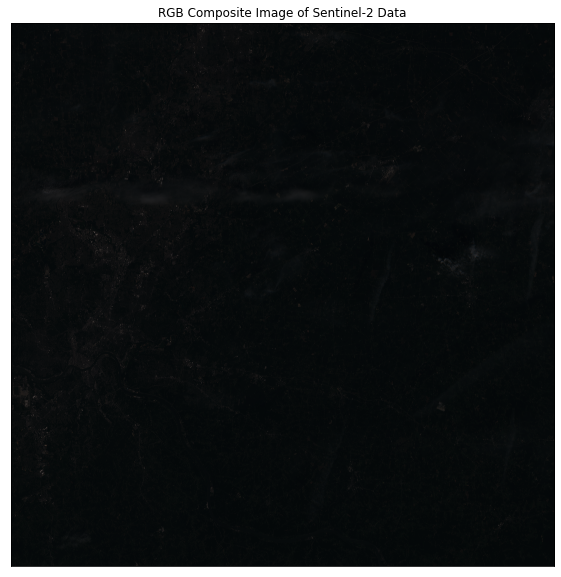

In [9]:
#plot rgb
ep.plot_rgb(data, rgb=(0,1,2), title='RGB Composite Image of Sentinel-2 Data')

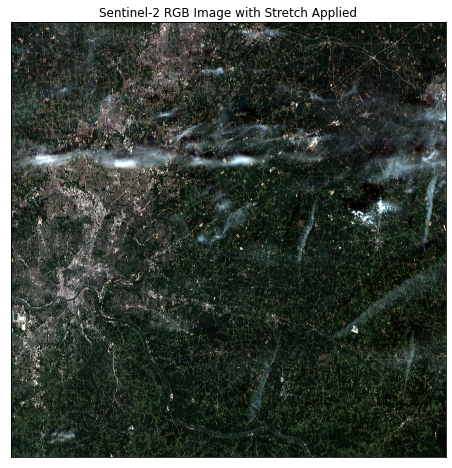

In [10]:
#rgb with stretch
ep.plot_rgb(
    data,
    rgb=(0,1,2),
    stretch=True,
    str_clip=0.5,
    figsize=(8,8),
    title="Sentinel-2 RGB Image with Stretch Applied",
)

plt.show()

 *Al10SABI* 
 
 chlorophyll


(w857 - w644) / (w458 +
w529)


 chlorophyll-a is used as the measure of chlorophyll
because it is the ubiquitous photosynthetic pigment found in both toxic
and non-toxic algal species, and it is helpful for the detection of blooming
conditions as well as blooms containing mixed algae species

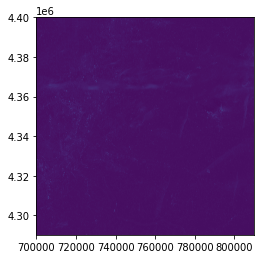

In [5]:
img2_458 = rio.open(all_sentinel_bands[1])
show(img2_458)

In [6]:
array458=img2_458.read()
array458.shape

(1, 10980, 10980)

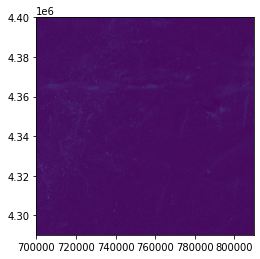

In [7]:
img3_529 = rio.open(all_sentinel_bands[2])
show(img3_529)

In [8]:
array529=img3_529.read()
array529.shape

(1, 10980, 10980)

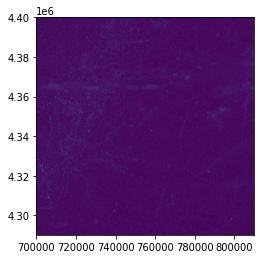

In [9]:
img4_644 = rio.open(all_sentinel_bands[3])
show(img4_644)

In [10]:
array644=img4_644.read()
array644.shape

(1, 10980, 10980)

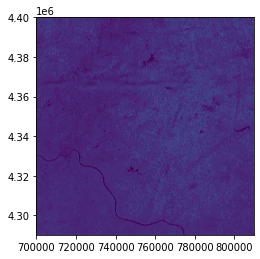

In [11]:
img8_857 = rio.open(all_sentinel_bands[7])
show(img8_857)

In [13]:
array857=img8_857.read()
array857.shape

(1, 10980, 10980)

In [14]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

*NDWI Calculation for detection of water*


ndwi2 = (green_b.astype(float)-nir_b.astype(float))/(green_b+nir_b)

NDWI Shape:  (1, 10980, 10980)


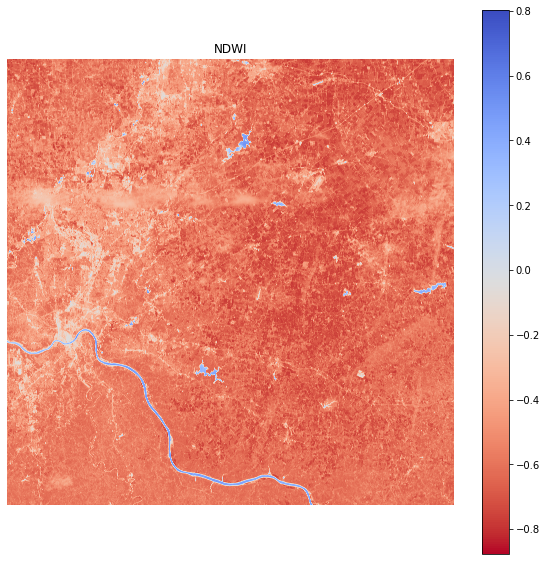

In [15]:
ndwi2 = (array529.astype(float)-array857.astype(float))/(array529+array857)
show_band(ndwi2, title='NDWI', size=(10,10), cmap='coolwarm_r')

In [16]:
ndwi2

array([[[-0.62801932, -0.64510565, -0.66984816, ..., -0.53338969,
         -0.52728227, -0.53319394],
        [-0.63739624, -0.65314927, -0.66760441, ..., -0.54882665,
         -0.54843517, -0.55406746],
        [-0.65992251, -0.66666667, -0.65884127, ..., -0.59088682,
         -0.57033493, -0.57115292],
        ...,
        [-0.59265838, -0.55520703, -0.58659549, ..., -0.66733467,
         -0.68550485, -0.70151962],
        [-0.57205514, -0.59529277, -0.594478  , ..., -0.67445328,
         -0.67617654, -0.68960739],
        [-0.62789501, -0.62011464, -0.61090718, ..., -0.68285099,
         -0.70169492, -0.69778761]]])

In [17]:
chlorophylla=[(array857[i] - array644[i])/(array458[i] + array529[i]) for i in range(len(array857))]

In [19]:
cha=numpy.array(chlorophylla)

In [20]:
cha.shape

(1, 10980, 10980)

In [21]:
min=numpy.amin(cha)
min

0.0

In [22]:
max=numpy.amax(cha)
max

56.57772020725388

In [23]:
cha

array([[[1.76074661, 1.91268917, 2.04141291, ..., 1.21226142,
         1.19078591, 1.1862851 ],
        [1.80136596, 1.94294118, 2.03642987, ..., 1.26355748,
         1.25402793, 1.27627302],
        [1.96802842, 2.02884615, 1.96863905, ..., 1.47738981,
         1.38590786, 1.37732749],
        ...,
        [1.52547981, 1.33247588, 1.4921466 , ..., 2.05048409,
         2.20454545, 2.35138889],
        [1.44204852, 1.55123217, 1.56518905, ..., 2.1056683 ,
         2.13541667, 2.25445816],
        [1.77942122, 1.69949495, 1.69936306, ..., 2.18150449,
         2.37168759, 2.35607094]]])

In [24]:
ndwi2.shape

(1, 10980, 10980)

In [25]:
ndwi2hl=[]

In [26]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      ndwi2hl.append(ndwi2[i][k][4500:5500])

In [27]:
cha_hl=[]

In [28]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      cha_hl.append(cha[i][k][4500:5500])

In [29]:
cha_hl_arr=numpy.array(cha_hl)
cha_hl_arr

array([[1.72686662, 1.62949195, 1.64853301, ..., 0.15015773, 0.17875989,
        0.6971877 ],
       [1.80433437, 1.66918239, 1.68514978, ..., 0.62354384, 0.1533123 ,
        0.19947507],
       [1.60260384, 1.63822963, 1.64447236, ..., 1.39948947, 0.55784373,
        0.21996186],
       ...,
       [1.94522378, 1.94133513, 1.60658083, ..., 2.05588429, 1.87827841,
        1.82083333],
       [1.89432624, 1.75799419, 1.6952177 , ..., 2.07661823, 2.01377953,
        1.90771259],
       [2.11977321, 2.04329897, 1.9103079 , ..., 1.89855072, 1.91911765,
        1.84819605]])

In [30]:
ndwi2hl=numpy.array(ndwi2hl)

In [31]:
ndwi2hl.shape

(500, 1000)

In [32]:
for j in range(len(cha_hl_arr)):
  for k in range(len(cha_hl_arr[j])):
    if(ndwi2hl[j][k]<0):
      cha_hl_arr[j][k]=0.0

In [33]:
cha_hl_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
for i in range(len(cha_hl_arr)):
  for j in range(len(cha_hl_arr[i])):
    cha_hl_arr[i][j]=cha_hl_arr[i][j]/max

In [35]:
cha_hl_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
cha_hl_arr.shape

(500, 1000)

In [37]:
harshalake=[cha_hl_arr]
harshalake=numpy.array(harshalake)
harshalake

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [99]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()


In [39]:
numpy.amin(harshalake)

0.0

In [40]:
numpy.amax(harshalake)

0.8481833169044123

Chlorophyll Values Shape:  (1, 500, 1000)


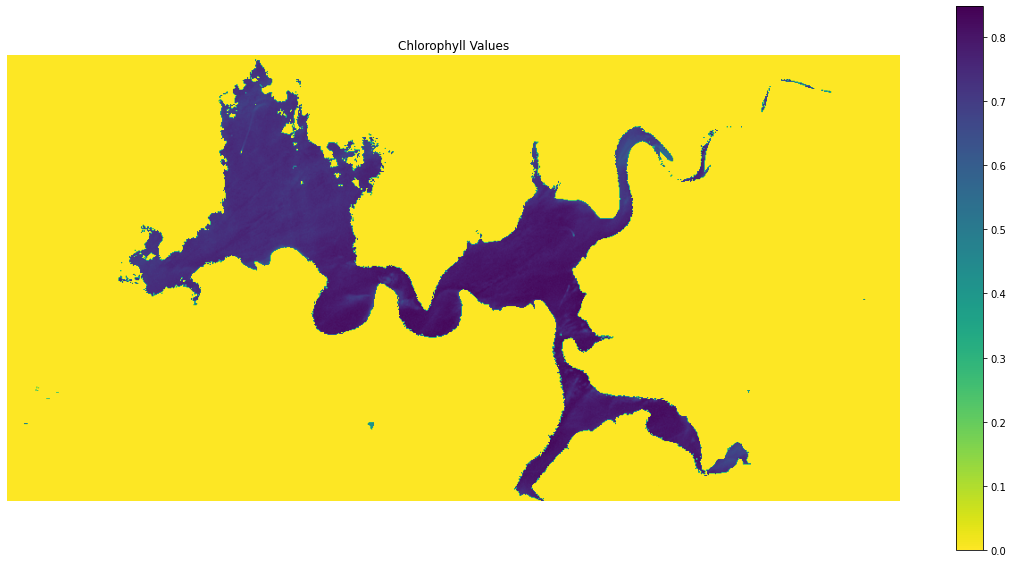

In [100]:
show_band(harshalake, title='Chlorophyll Values', size=(20,10), cmap="viridis_r")

In [42]:
# Define bins that you want, and then classify the data
cha_class_bins = [0, 0.3, 0.6, 0.7, 0.8, 1]
cha_sentinel_class = np.digitize(harshalake, cha_class_bins)

print(np.unique(cha_sentinel_class))

[1 2 3 4 5]


In [43]:
cha_sentinel_class.shape

(1, 500, 1000)

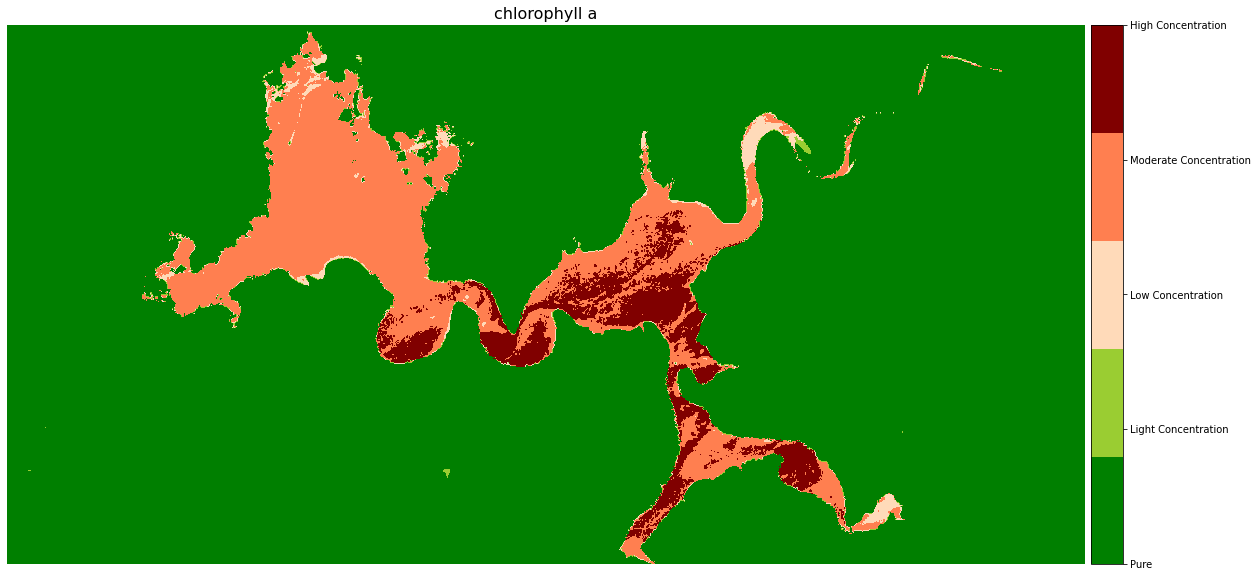

In [97]:
cha_cat_names = ["Pure",
                  "Light Concentration",
                  "Low Concentration",
                  "Moderate Concentration",
                  "High Concentration"]

nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]

nbr_cmap = ListedColormap(nbr_colors)

# Plot the data with a custom legend
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(cha_sentinel_class.reshape(cha_sentinel_class.shape[1:3]), cmap=nbr_cmap)

ax.set_title("chlorophyll a",
             fontsize=16)

cbar = ep.colorbar(im)

cbar.set_ticks(np.unique(cha_sentinel_class))
cbar.set_ticklabels(cha_cat_names)

# Turn off ticks
ax.set_axis_off()
plt.show()

*BGA/PC*

Be16FLHGreenRedNIR 

(w658) - (w857 + (w558 -w857))

 Phycocyanin (PC) is an important indicator of CHABs and
water quality risk because PC is a cyanobacteria/blue-green algae (BGA)-
specific pigment


In [45]:
array644

array([[[594, 529, 497, ..., 625, 714, 736],
        [583, 529, 499, ..., 739, 782, 777],
        [532, 514, 524, ..., 666, 725, 742],
        ...,
        [385, 407, 395, ..., 363, 363, 365],
        [369, 387, 371, ..., 360, 362, 371],
        [396, 417, 404, ..., 357, 364, 383]]], dtype=uint16)

In [46]:
a=array644.astype('float64')

In [47]:
a.shape

(1, 10980, 10980)

In [48]:
a

array([[[594., 529., 497., ..., 625., 714., 736.],
        [583., 529., 499., ..., 739., 782., 777.],
        [532., 514., 524., ..., 666., 725., 742.],
        ...,
        [385., 407., 395., ..., 363., 363., 365.],
        [369., 387., 371., ..., 360., 362., 371.],
        [396., 417., 404., ..., 357., 364., 383.]]])

In [49]:
array857

array([[[3707, 3815, 3849, ..., 2721, 2911, 2933],
        [3748, 3832, 3853, ..., 3069, 3117, 3133],
        [3856, 3890, 3851, ..., 3247, 3282, 3257],
        ...,
        [2690, 2479, 2675, ..., 3328, 3564, 3751],
        [2509, 2779, 2772, ..., 3369, 3437, 3658],
        [3163, 3109, 3072, ..., 3518, 3765, 3837]]], dtype=uint16)

In [50]:
b=array644.astype('float64')

In [51]:
b.shape

(1, 10980, 10980)

In [52]:
b

array([[[594., 529., 497., ..., 625., 714., 736.],
        [583., 529., 499., ..., 739., 782., 777.],
        [532., 514., 524., ..., 666., 725., 742.],
        ...,
        [385., 407., 395., ..., 363., 363., 365.],
        [369., 387., 371., ..., 360., 362., 371.],
        [396., 417., 404., ..., 357., 364., 383.]]])

In [53]:
array529

array([[[847, 823, 761, ..., 828, 901, 893],
        [830, 804, 768, ..., 894, 909, 899],
        [790, 778, 792, ..., 835, 898, 889],
        ...,
        [688, 709, 697, ..., 664, 665, 658],
        [683, 705, 705, ..., 655, 664, 672],
        [723, 729, 742, ..., 663, 660, 683]]], dtype=uint16)

In [54]:
c=array529.astype('float64')

In [55]:
c.shape

(1, 10980, 10980)

In [56]:
c

array([[[847., 823., 761., ..., 828., 901., 893.],
        [830., 804., 768., ..., 894., 909., 899.],
        [790., 778., 792., ..., 835., 898., 889.],
        ...,
        [688., 709., 697., ..., 664., 665., 658.],
        [683., 705., 705., ..., 655., 664., 672.],
        [723., 729., 742., ..., 663., 660., 683.]]])

In [57]:
pca=((a)-(b+(c - b)))

In [58]:
pca

array([[[-253., -294., -264., ..., -203., -187., -157.],
        [-247., -275., -269., ..., -155., -127., -122.],
        [-258., -264., -268., ..., -169., -173., -147.],
        ...,
        [-303., -302., -302., ..., -301., -302., -293.],
        [-314., -318., -334., ..., -295., -302., -301.],
        [-327., -312., -338., ..., -306., -296., -300.]]])

In [59]:
min=numpy.amin(pca)
min

-11241.0

In [60]:
max=numpy.amax(pca)
max

8653.0

In [114]:
pca

array([[[-253., -294., -264., ..., -203., -187., -157.],
        [-247., -275., -269., ..., -155., -127., -122.],
        [-258., -264., -268., ..., -169., -173., -147.],
        ...,
        [-303., -302., -302., ..., -301., -302., -293.],
        [-314., -318., -334., ..., -295., -302., -301.],
        [-327., -312., -338., ..., -306., -296., -300.]]])

In [115]:
pca.shape

(1, 10980, 10980)

In [116]:
pca_hl=[]

In [117]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      pca_hl.append(pca[i][k][4500:5500])

In [65]:
pca_hl=numpy.array(pca_hl)

In [66]:
pca_hl.shape

(500, 1000)

In [74]:
for j in range(len(pca_hl)):
  for k in range(len(pca_hl[j])):
    if(ndwi2hl[j][k]<0):
      pca_hl[j][k]=0.0

In [75]:
pca_hl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
numpy.amin(pca_hl)

0.0

In [77]:
numpy.amax(pca_hl)

0.5853021011360209

In [78]:
for i in range(len(pca_hl)):
  for j in range(len(pca_hl[i])):
    pca_hl[i][j]=((pca_hl[i][j]/max))

In [79]:
pca_hl=numpy.array(pca_hl)

In [80]:
pca_hl.shape

(500, 1000)

In [81]:
harshalake_pca=[pca_hl]
harshalake_pca=numpy.array(harshalake_pca)
harshalake_pca

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [82]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

PCA Values Shape:  (1, 500, 1000)


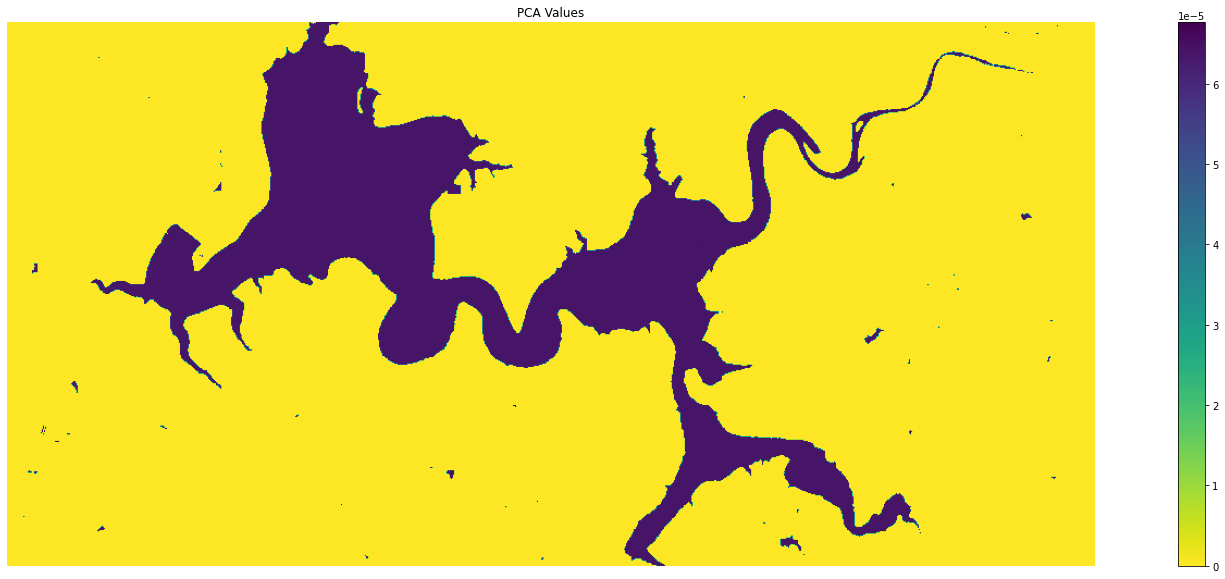

In [84]:
show_band(harshalake_pca, title='PCA Values', size=(30,10), cmap="viridis_r")

*TurbBow06RedOverGreen* 

turbidity (w658 / w558)

Turbidity is the relative clarity of water, and
specifically it is the backscattering caused by suspended materials in the
water. As such, turbidity is not a measure of CHABs directly but has been
shown to be highly correlated with chlorophyll and BGA/PC
concentrations in highly productive eutrophic water bodies and can be an
early warning sign


In [85]:
turbidity=array644/array529

In [86]:
turbidity

array([[[0.7012987 , 0.64277035, 0.65308804, ..., 0.75483092,
         0.79245283, 0.82418813],
        [0.70240964, 0.6579602 , 0.64973958, ..., 0.82662192,
         0.86028603, 0.86429366],
        [0.67341772, 0.66066838, 0.66161616, ..., 0.79760479,
         0.80734967, 0.83464567],
        ...,
        [0.55959302, 0.57404795, 0.56671449, ..., 0.54668675,
         0.54586466, 0.55471125],
        [0.54026354, 0.54893617, 0.52624113, ..., 0.54961832,
         0.54518072, 0.55208333],
        [0.54771784, 0.57201646, 0.54447439, ..., 0.53846154,
         0.55151515, 0.56076135]]])

In [87]:
turbidity_hl=[]

In [88]:
for i in range(1):
  for j in range(1):
    for k in range(7500,8000):
      turbidity_hl.append(turbidity[i][k][4500:5500])

In [89]:
for j in range(len(turbidity_hl)):
  for k in range(len(turbidity_hl[j])):
    if(ndwi2hl[j][k]<0):
      turbidity_hl[j][k]=0.0

In [94]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

In [90]:
numpy.amin(turbidity_hl)

0.0

In [91]:
numpy.amax(turbidity_hl)

1.2377581120943952

In [92]:
turbidity_hl=numpy.array(turbidity_hl)

Turbidity Values Shape:  (500, 1000)


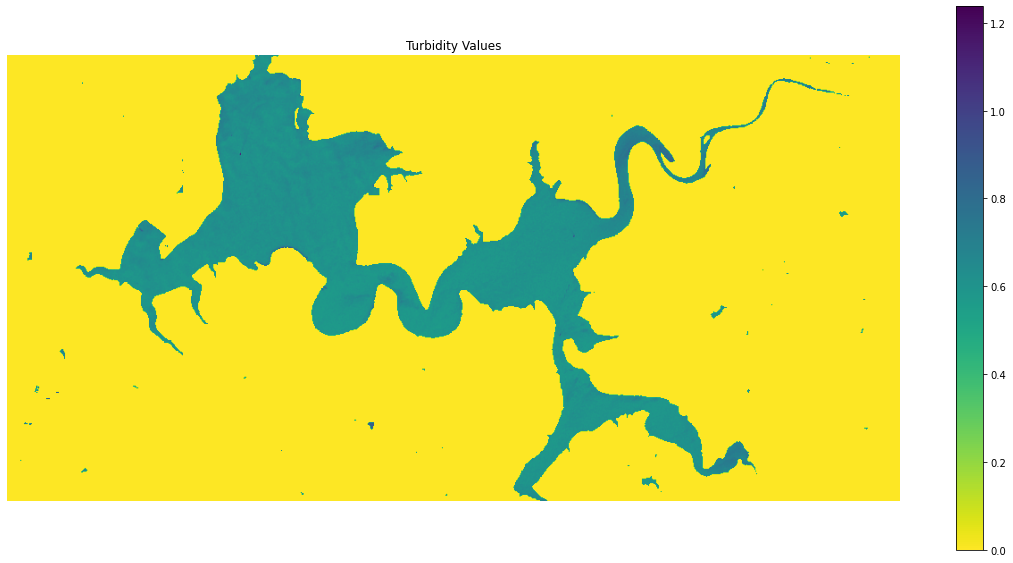

In [96]:
show_band(turbidity_hl, title='Turbidity Values', size=(20,10), cmap="viridis_r")